# Модель астроцита - иерархический сумматор


$ T $ - время моделирования в шагах;

$ N $ - количество уровней;

$ a $ - массив со значениями ячеек всех уровней;

$ q $ - коэффициент частоты активации ячейки;

$ \epsilon $ - амплитуда начального возбуждения ячейки;

$ \alpha $ - коэффициент диссипации амплитуды в ячейке;

$ \beta $ - порог возобновления возможности возбуждения в ячейке;

$ \gamma $ - порог прохождения сигнала на следующий уровень;

729


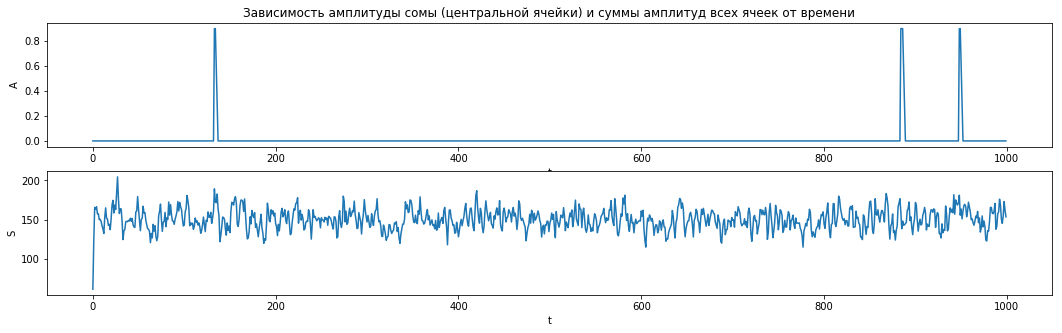

Время выполнения: 0.85 секунд


In [29]:
%matplotlib inline

import numpy.random as rand
import matplotlib.pyplot as plt
import time

start = time.time()

q = .1
epsilon = .9
alpha = .3
beta = .9
gamma = 1.0
N = 6
T = 1000
a = [[0] * 3**(N - n) for n in range(N + 1)]

timer = []
amp = []
sum = []

for t in range(T):
    s = 0
    for i in range(len(a[0])):
        if a[0][i] != 0:
            a[0][i] = round(a[0][i] - alpha, 1)
        else:
            if rand.random_sample() < q:
                a[0][i] = epsilon
        s = s + a[0][i]
    for n in range(1, N + 1):
        for j in range(3**(N - n)):
            if a[n][j] != 0:
                a[n][j] = round(a[n][j] - alpha, 1)
            prevLvlSum = a[n - 1][3*j] + a[n - 1][3*j + 1] + a[n - 1][3*j + 2]
            if (prevLvlSum >= gamma and a[n][j] <= beta):
                a[n][j] = epsilon
            s = s + a[n][j]
    timer.append(t)
    amp.append(a[N][0])
    sum.append(s)
#print('end', a)
print(len(a[0]))

plt.figure(1, figsize=(18,5))
plt.subplot(211)
plt.plot(timer, amp)
plt.xlabel('t')
plt.ylabel('A')
plt.title('Зависимость амплитуды сомы (центральной ячейки) и суммы амплитуд всех ячеек от времени')
plt.subplot(212)
plt.plot(timer, sum)
plt.xlabel('t')
plt.ylabel('S')
plt.show()

finish = time.time()
print('Время выполнения: %s секунд' % round(finish - start, 2))